# Ques6. Use Simple Kmeans, DBScan, Hierachical clustering algorithms for clustering.
### Compare the performance of clustersby changing the parameters involved in thealgorithms


In [1]:
#importing necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ('ignore')
#importing libraries for machine learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

In [2]:
#importing the dataset
df = pd.read_csv('wine.csv')

In [3]:

df.head(5)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


# K-Means Model



In [5]:
x = df.iloc[:,:].values

In [6]:
mms = MinMaxScaler()
x = mms.fit_transform(x)

# Elbow Method
### To identify the exact no of clusters we will use elbow method

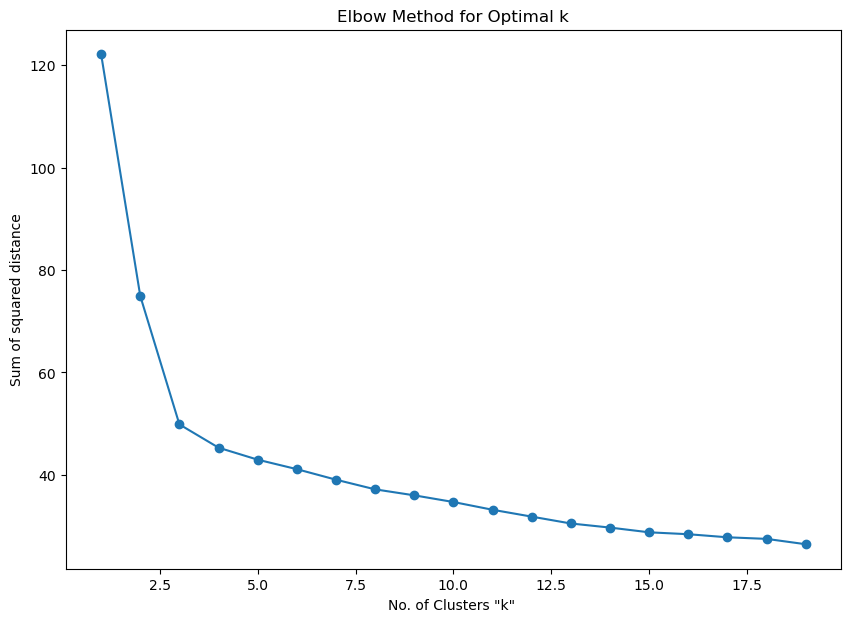

In [7]:
dist =[]
for i in range(1,20):
 kmodel = KMeans(
 n_clusters = i, init = 'random',
 n_init = 10, max_iter = 300,
 tol = 1e-04, random_state = 65
 )
 kmodel.fit(x)
 dist.append(kmodel.inertia_)

fig = plt.figure(figsize=(10,7))
plt.plot(range(1,20),dist,
 marker="o")
plt.xlabel('No. of Clusters "k" ')
plt.ylabel('Sum of squared distance')
plt.title('Elbow Method for Optimal k')
plt.show()

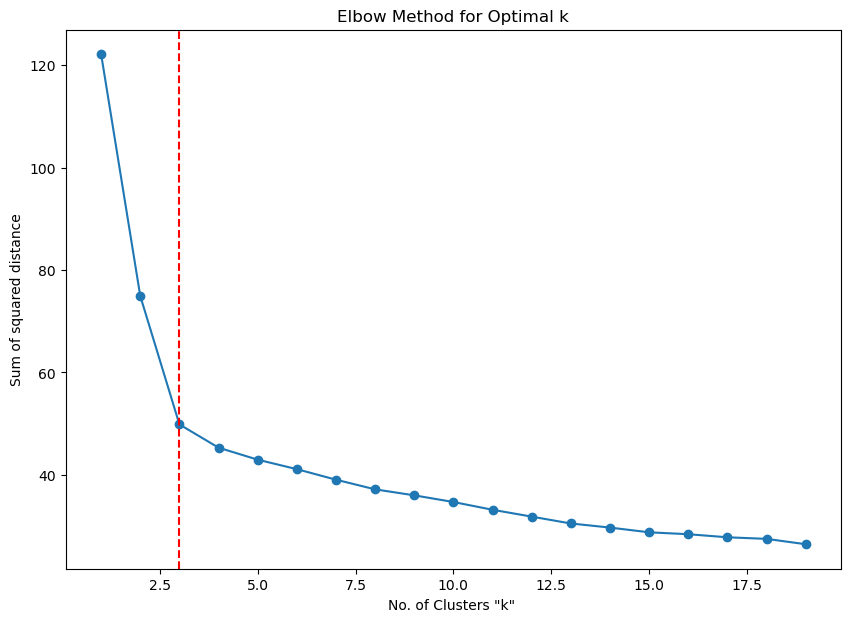

In [8]:
dist =[]
for i in range(1,20):
 kmodel = KMeans(
 n_clusters = i, init = 'random',
 n_init = 10, max_iter = 300,
 tol = 1e-04, random_state = 65
 )
 kmodel.fit(x)
 dist.append(kmodel.inertia_)

fig = plt.figure(figsize=(10,7))
plt.plot(range(1,20),dist,
 marker="o")
plt.xlabel('No. of Clusters "k" ')
plt.ylabel('Sum of squared distance')
plt.title('Elbow Method for Optimal k')
plt.axvline(3, ls="--"
, c="red")
plt.show()

# From the above Elbow graph it can be inferred that 3 clusters can be chosen for segmentation
### K - Means model with 3 clusters

In [9]:
kmodel = KMeans(
 n_clusters = 3, init = 'random',
 n_init = 10, max_iter = 300,
 tol = 1e-04, random_state = 65
 )

In [10]:
pred = kmodel.fit_predict(x)

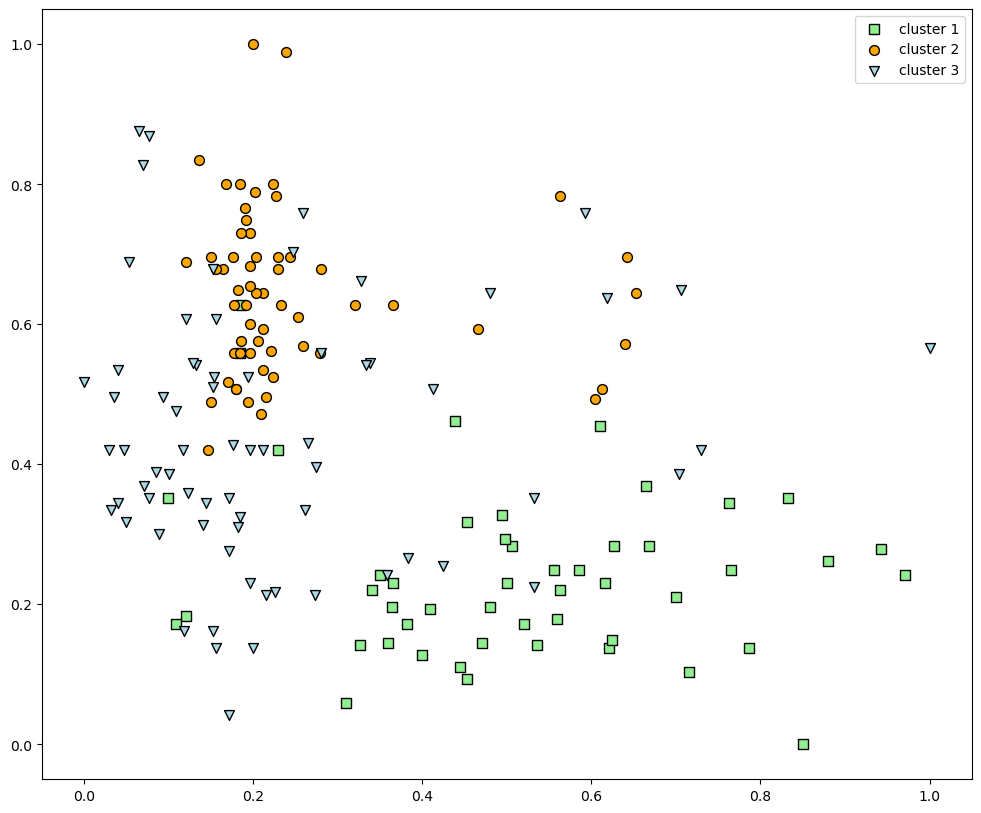

In [11]:
plt.figure(figsize = (12,10))
plt.scatter(
x[pred == 0, 2], x[pred == 0, 6],
s = 50, c = 'lightgreen',
marker = 's', edgecolor = 'black',
label = 'cluster 1'
)
plt.scatter(
x[pred == 1, 2], x[pred == 1, 6],
s = 50, c = 'orange',
marker = 'o', edgecolor = 'black',
label = 'cluster 2'
)
plt.scatter(
x[pred == 2, 2], x[pred == 2, 6],
s = 50, c = 'lightblue',
marker = 'v', edgecolor = 'black',
label ='cluster 3'
)
plt.legend()


# Hierarchical clustering
#Data Scaling

In [12]:
data_scaled = normalize(df)
data_scaled = pd.DataFrame(data_scaled , columns = df.columns)
data_scaled.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,0.000932,0.013264,0.001594,0.002265,0.014542,0.118383,0.002610,0.002852,0.000261,0.002135,0.005257,0.000969,0.003654,0.992738
1,0.000948,0.012513,0.001687,0.002029,0.010617,0.094794,0.002512,0.002616,0.000246,0.001213,0.004152,0.000995,0.003223,0.995336
2,0.000841,0.011063,0.001984,0.002245,0.015636,0.084906,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996175
3,0.000674,0.009680,0.001314,0.001684,0.011317,0.076119,0.002593,0.002351,0.000162,0.001468,0.005254,0.000579,0.002324,0.996961
4,0.001343,0.017775,0.003477,0.003853,0.028193,0.158417,0.003759,0.003611,0.000524,0.002443,0.005800,0.001396,0.003934,0.986752


# Building dendegram to determine the optimal no of clusters

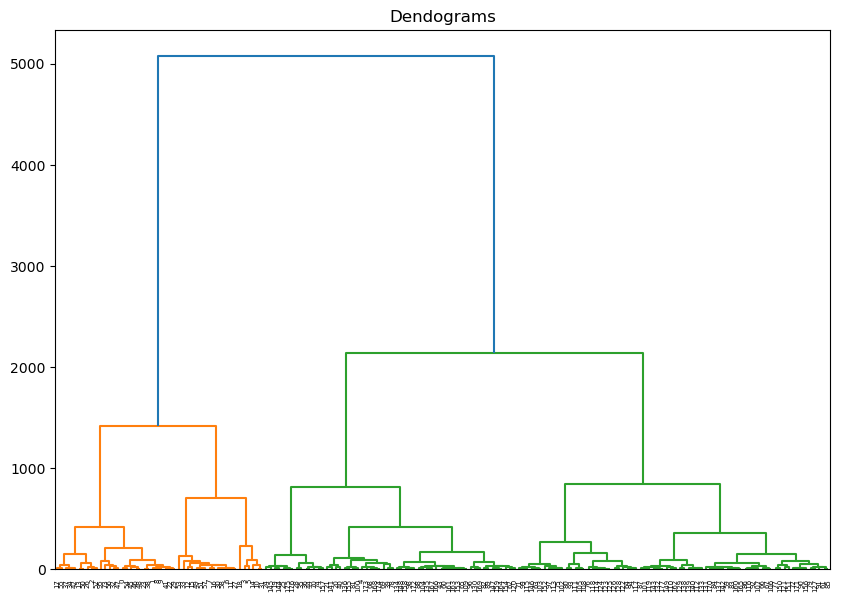

In [13]:
plt.figure(figsize=(10, 7))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(df, method='ward'))

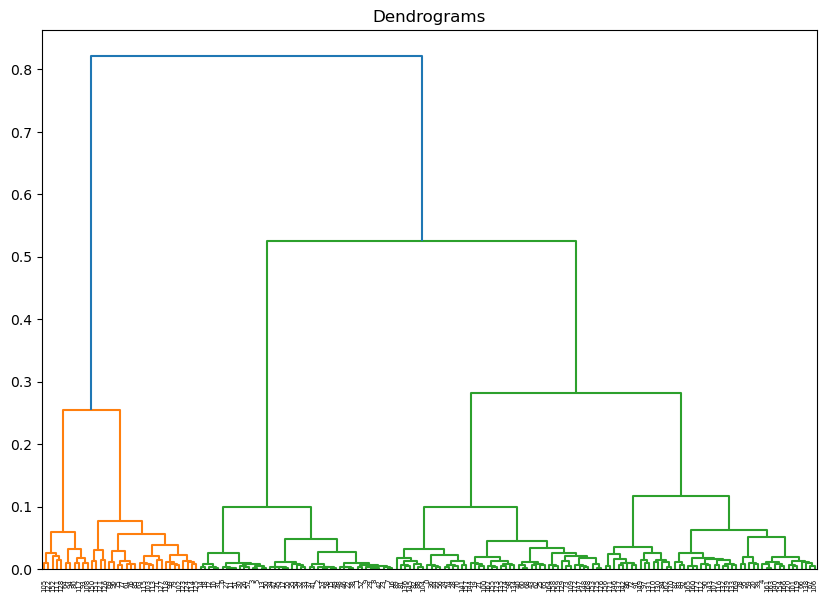

In [14]:
plt.figure(figsize = (10,7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled , method = 'ward'))
plt.axhline(y = 6.4 , color = 'r',linestyle = '--')


In [15]:
#forming three clusters
cluster = AgglomerativeClustering(n_clusters = 3 , affinity = 'euclidean')
cluster.fit_predict(data_scaled)

array([0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

# Visualizing the clusters

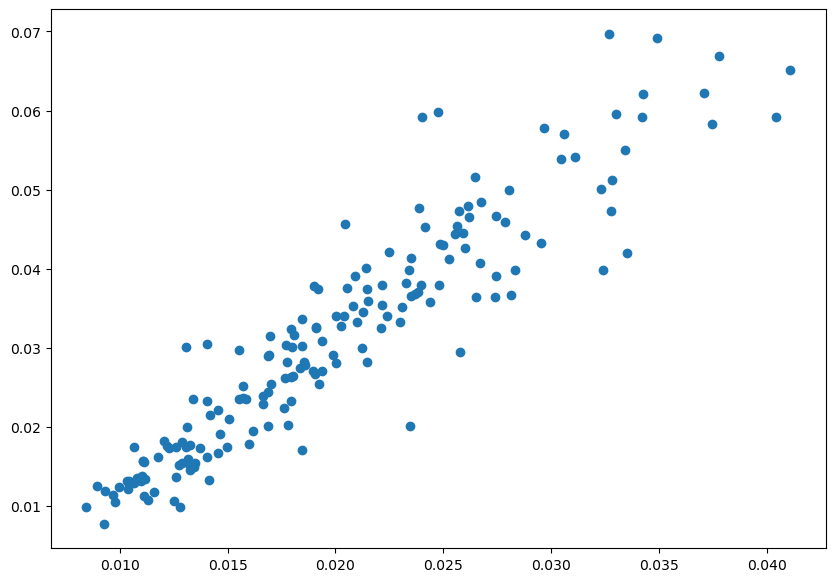

In [16]:
plt.figure(figsize = (10,7))
plt.scatter(data_scaled['Alcohol'] , data_scaled['Acl'])

# DBSCAN Algorithm Clustering
### Compute data proximity from each other using Nearest Neighbours

In [17]:
neighb = NearestNeighbors(n_neighbors=2)
nbrs=neighb.fit(x)
distances, indices=nbrs.kneighbors(x)

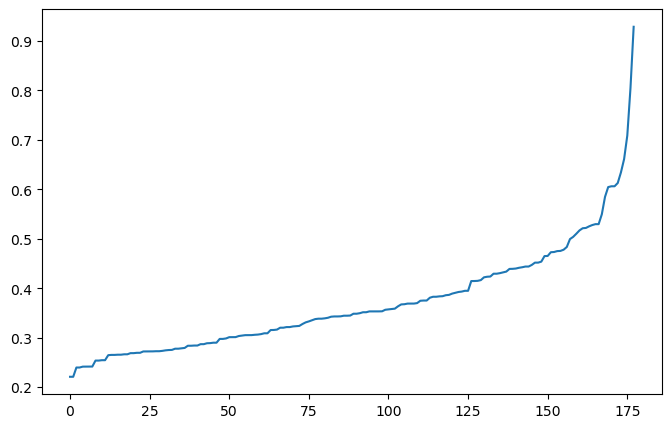

In [18]:
plt.figure(figsize = (8,5))
distances = np.sort(distances, axis = 0)
distances = distances[:, 1]
plt.plot(distances)
plt.show()

In [19]:
#cluster the data into three clusters
dbscan = DBSCAN(eps = 7, min_samples = 4).fit(x) # fitting the model
labels = dbscan.labels_


# Plotting the clusters


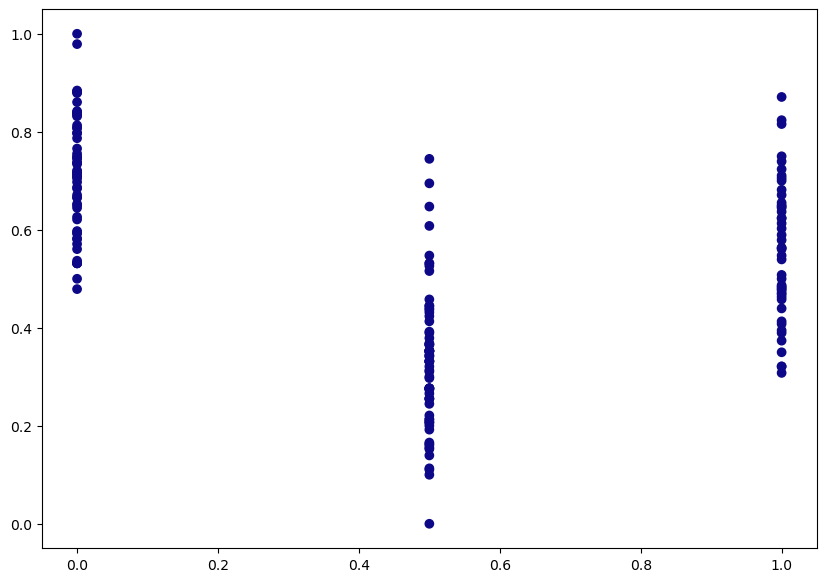

In [20]:
plt.figure(figsize = (10,7))
plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma")
plt.show()